# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

## Загрузка и подготовка данных

In [2]:
def primary_information(df):
    print(f"Размерность: {df.shape}")
    display(df.info())
    display(df.head())

In [3]:
geo_data_0_df = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')
geo_data_1_df = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')
geo_data_2_df = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')

In [4]:
primary_information(geo_data_0_df)
primary_information(geo_data_1_df)
primary_information(geo_data_2_df)

Размерность: (100000, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


Размерность: (100000, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


Размерность: (100000, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [5]:
def draw_boxplots(df, cols, title):
    fig, axs = plt.subplots(ncols=len(cols), nrows=1, figsize=(16, 4))
    for i in range(len(cols)):
        sns.boxplot(data = geo_data_0_df, y=cols[i], ax=axs[i])
        axs[i].set_xlabel(cols[i])
        axs[i].set_ylabel('')
    fig.suptitle(title, fontsize=30);

In [6]:
def draw_histplots(df, cols, title):
    fig, axs = plt.subplots(ncols=len(cols), nrows=1, figsize=(16, 4))
    for i in range(len(cols)):
        sns.histplot(data = geo_data_0_df, x=cols[i], ax=axs[i])
        axs[i].set_xlabel(cols[i])
        axs[i].set_ylabel('')
    fig.suptitle(title, fontsize=30);

In [7]:
def draw_scatterplot_with_product(df, cols):
    fig, axs = plt.subplots(ncols=len(cols), nrows=1, figsize=(16, 4))
    for i in range(len(cols)):
        sns.scatterplot(data=df, x='product', y=cols[i], ax=axs[i])
    fig.suptitle(f"Диаграммы рассеяния для объёма запасов в скважине и {cols[i]}", fontsize=20)

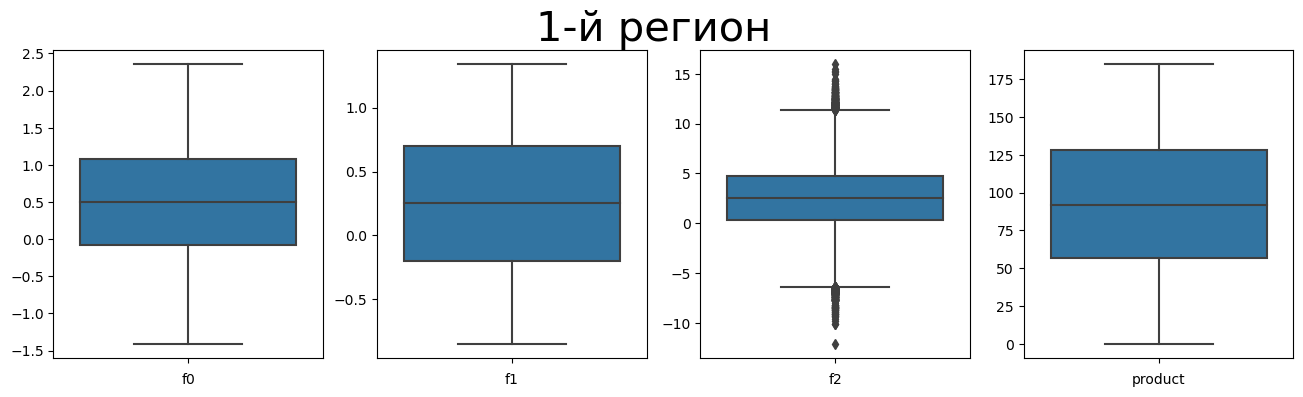

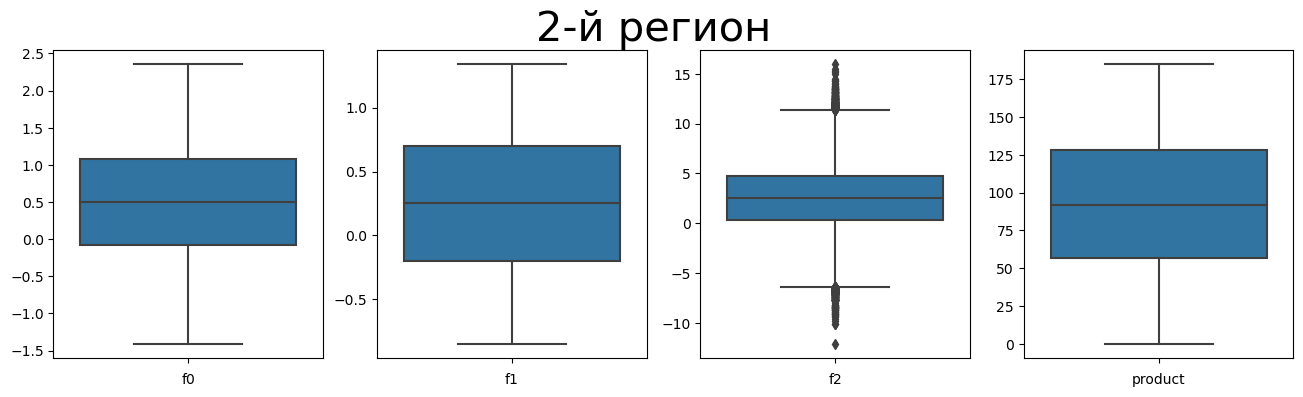

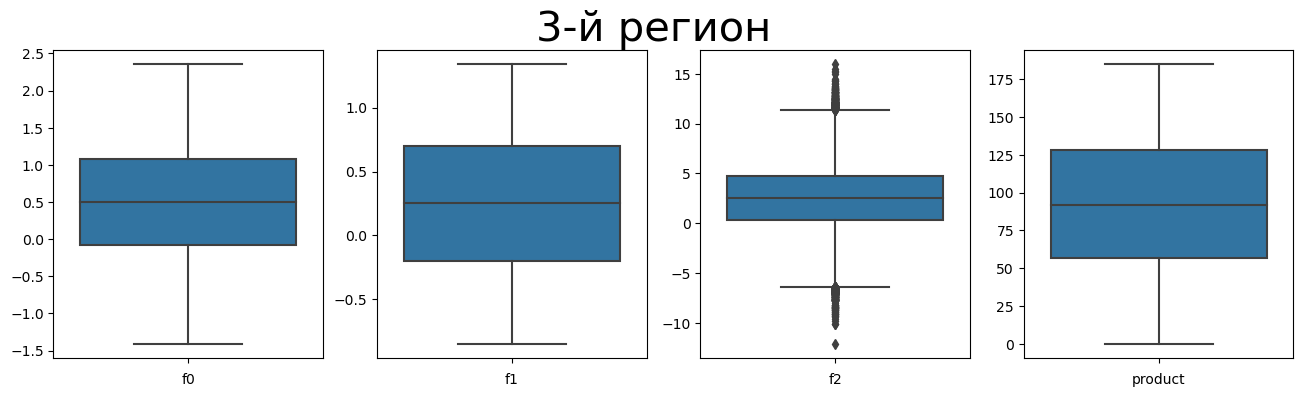

In [8]:
draw_boxplots(geo_data_0_df, ['f0', 'f1', 'f2', 'product'], '1-й регион')
draw_boxplots(geo_data_1_df, ['f0', 'f1', 'f2', 'product'], '2-й регион')
draw_boxplots(geo_data_2_df, ['f0', 'f1', 'f2', 'product'], '3-й регион')

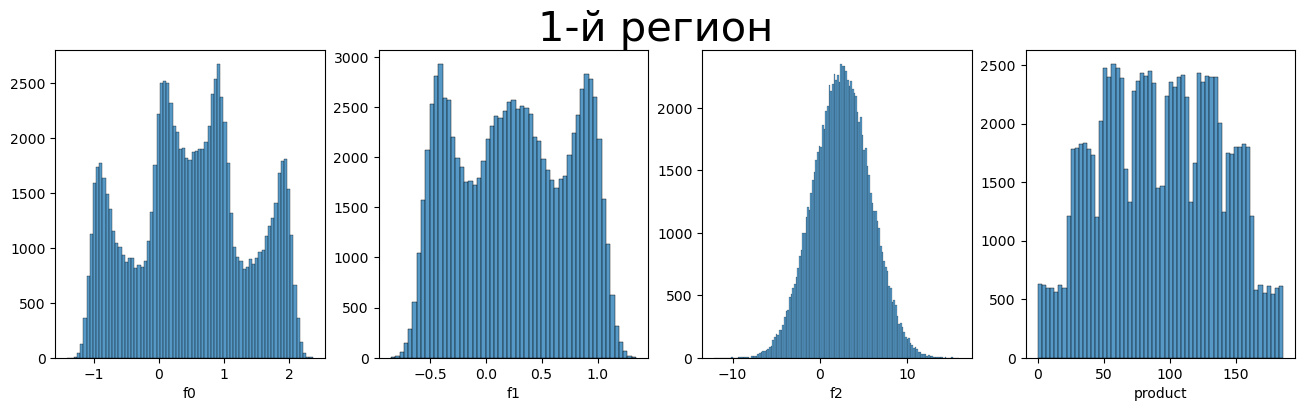

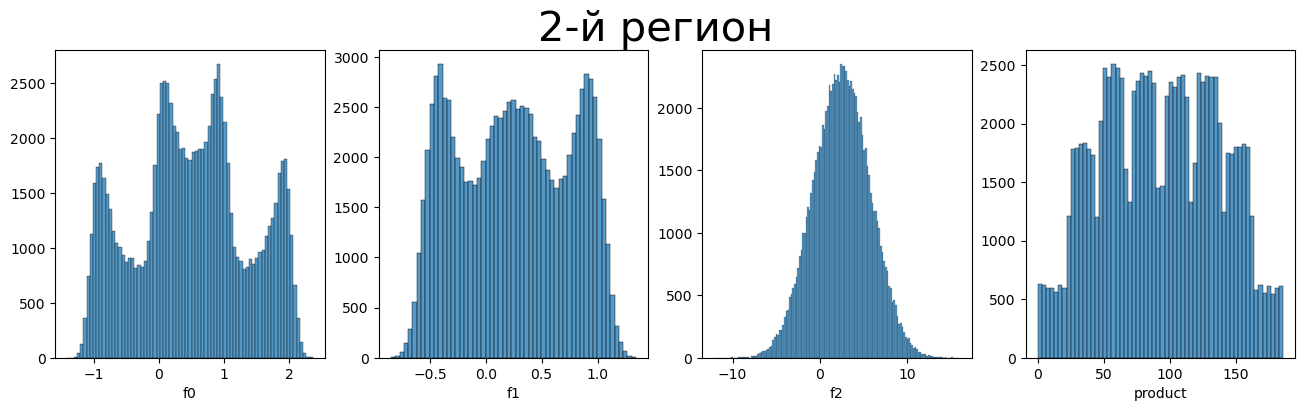

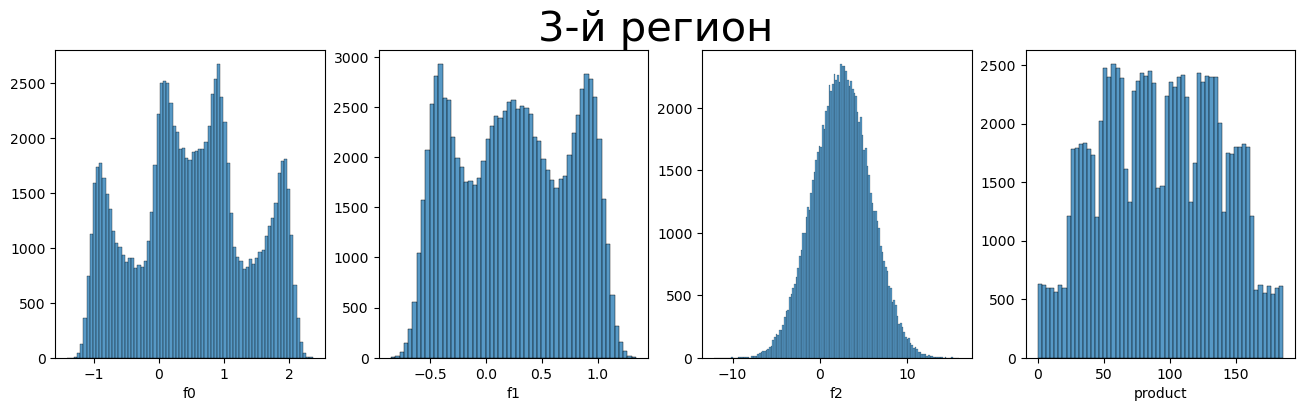

In [9]:
draw_histplots(geo_data_0_df, ['f0', 'f1', 'f2', 'product'], '1-й регион')
draw_histplots(geo_data_1_df, ['f0', 'f1', 'f2', 'product'], '2-й регион')
draw_histplots(geo_data_2_df, ['f0', 'f1', 'f2', 'product'], '3-й регион')

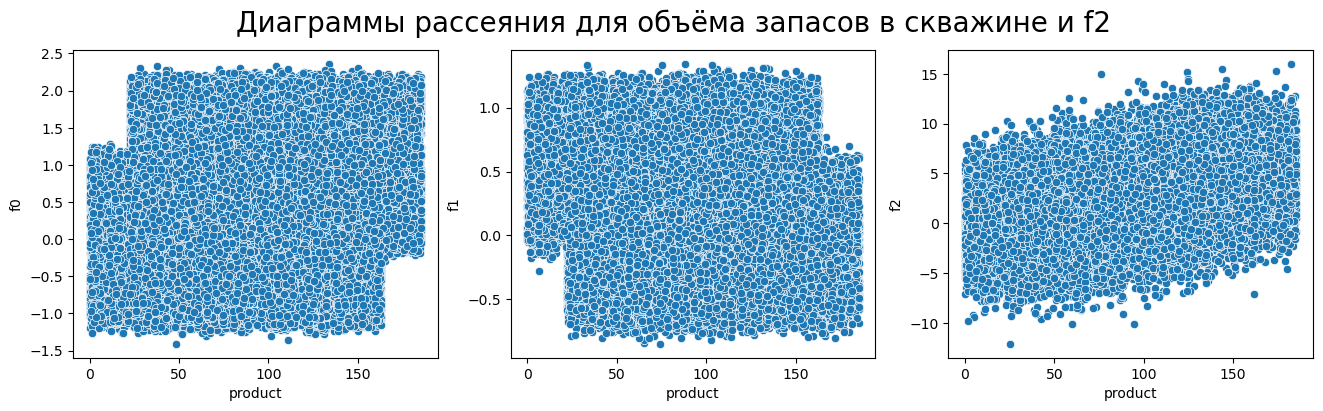

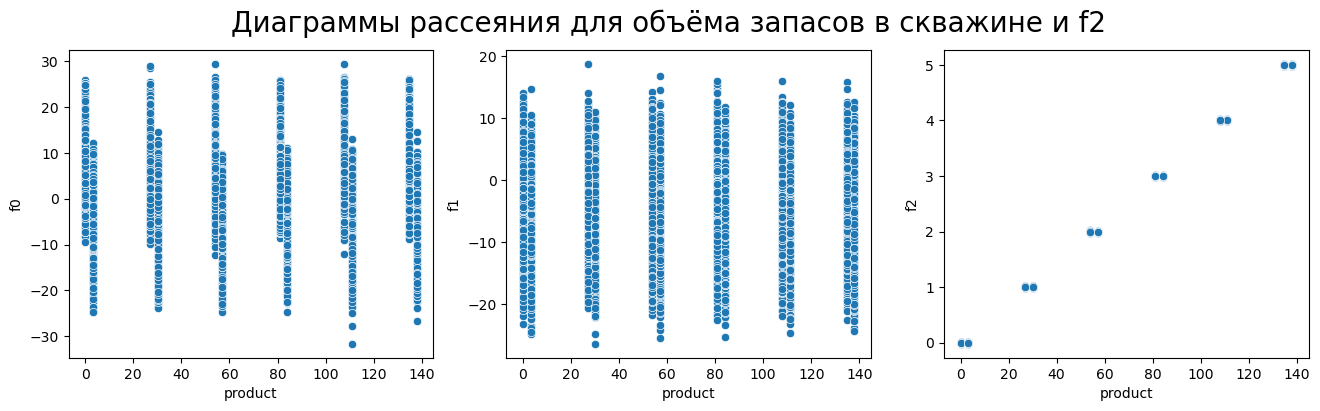

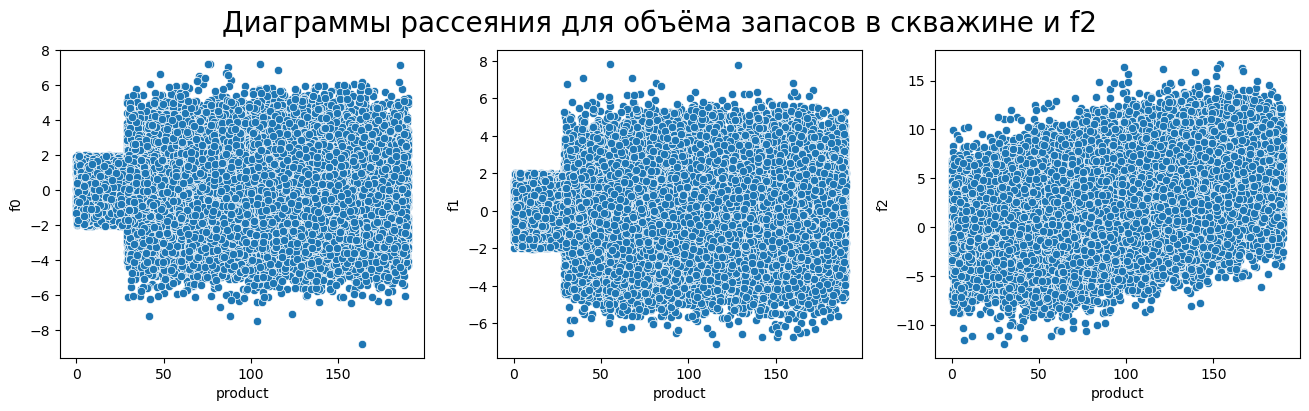

In [10]:
draw_scatterplot_with_product(geo_data_0_df, ['f0', 'f1', 'f2'])
draw_scatterplot_with_product(geo_data_1_df, ['f0', 'f1', 'f2'])
draw_scatterplot_with_product(geo_data_2_df, ['f0', 'f1', 'f2'])

### Промежуточный вывод
Было успешно выгружено три датасета по трем регионам. Датасеты пропущенных и аномальных значений не имеют. Распределения входных признаков от региона не отличаются, однако, оказывают различное влияние на целевой признак

## Обучение и проверка модели

In [11]:
RANDOM_STATE = 42

In [12]:
def fit_predict(df):
    X = df.drop(['product', 'id'], axis=1)
    y = df['product']
    X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y,
        test_size=0.25,
        random_state=RANDOM_STATE
    )
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model_lr  = LinearRegression()
    model_lr.fit(X_train, y_train)

    predictions = model_lr.predict(X_test)

    rmse = mean_squared_error(predictions, y_test, squared=False)
    print(f'Средний запас предсказанного сырья = {np.mean(predictions):.2f}, RMSE = {rmse:.2f}')
    return predictions, y_test

In [13]:
print("Регион 1")
predictions_0, y_test_0 = fit_predict(geo_data_0_df)
print("Регион 2")
predictions_1, y_test_1 = fit_predict(geo_data_1_df)
print("Регион 3")
predictions_2, y_test_2 = fit_predict(geo_data_2_df);

Регион 1
Средний запас предсказанного сырья = 92.40, RMSE = 37.76
Регион 2
Средний запас предсказанного сырья = 68.71, RMSE = 0.89
Регион 3
Средний запас предсказанного сырья = 94.77, RMSE = 40.15


## Подготовка к расчёту прибыли

In [14]:
price = 450000 # Доход с каждой единицы продукта
budget = 10e9 # Бюджет на разработку скважин в регионе
oil_fields_qty = 500 # Количество точек при разведки региона
oil_fields_limit = 200 # Количество точек отбираемых с помощью машинного обучения

Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. 

In [15]:
needed_amount = budget / oil_fields_qty / price
print(f"Достаточный объём сырья для безубыточной разработки новой скважины: {needed_amount:.2f}")

Достаточный объём сырья для безубыточной разработки новой скважины: 44.44


Сравните полученный объём сырья со средним запасом в каждом регионе. 

In [16]:
def check_region(budget, price, oil_fields_limit, predictions, region):
    if needed_amount <= np.mean(predictions):
        print(f"Регион {region} обладает достаточным объёмом сырья для безубыточной разработки новой скважины")
    else:
        print(f"Объёма сырья в регионе {region} недостаточно для безубыточной разработки новой скважины")

In [17]:
check_region(budget, price, oil_fields_limit, predictions_0, 0)
check_region(budget, price, oil_fields_limit, predictions_1, 1)
check_region(budget, price, oil_fields_limit, predictions_2, 2)

Регион 0 обладает достаточным объёмом сырья для безубыточной разработки новой скважины
Регион 1 обладает достаточным объёмом сырья для безубыточной разработки новой скважины
Регион 2 обладает достаточным объёмом сырья для безубыточной разработки новой скважины


## Расчёт прибыли и рисков 

In [21]:
def get_profit(df, predictions, price):
    idx = predictions.sort_values(ascending=False).head(oil_fields_limit).index
    return df.loc[idx, 'product'].sum() * price

In [27]:
def calculate_profit(df, y_pred):
    # Выбор скважин с максимальными предсказаниями
    selected_indexes = y_pred.sort_values(ascending=False).head(200)
 
    # Вычисление суммарного объема сырья и прибыли
    selected_volume = df.loc[selected_indexes.index]
    selected_profit = selected_volume.sum() * cost_for_bar
 
    return selected_profit
 
 
from sklearn.utils import resample
 
def bootstrap_profit(y_val, y_pred, n_samples=1000):
    """
    Применяет технику Bootstrap для оценки распределения прибыли.
 
    Args:
        y_val (pandas.DataFrame): Валидационная выборка.
        y_pred (pandas.Series): Предсказанные значения.
        n_samples (int): Количество выборок для Bootstrap.
 
    Returns:
        pandas.DataFrame: Результаты Bootstrap, содержащие среднюю прибыль, 95%-й доверительный интервал и риск убытков.
    """
 
    # Приводим объекты к одному состоянию
    y_val = y_val.reset_index(drop=True)
    y_pred = pd.Series(y_pred)
 
    # Инициализация результатов
    results = pd.DataFrame(columns=['mean_profit', 'ci_lower', 'ci_upper', 'loss_risk'])
 
    # Выполнение Bootstrap
    for i in range(n_samples):
        # Выборка данных с заменой
        resampled_y_val = resample(y_val, replace=True, n_samples=len(y_val))
 
        # Вычисление прибыли для выборки
        resampled_y_pred = y_pred.loc[resampled_y_val.index]
 
        resampled_profit = calculate_profit(resampled_y_val, resampled_y_pred)
 
        # Сохранение результатов
        results.loc[i, 'mean_profit'] = resampled_profit
 
    # Вычисление средней прибыли, доверительного интервала и риска убытков
    results['ci_lower'] = results['mean_profit'].quantile(0.025)
    results['ci_upper'] = results['mean_profit'].quantile(0.975)
    results['loss_risk'] = (results['mean_profit'] < 0).mean()
 
    return results

array([101.90101715,  78.21777385, 115.26690103, ...,  82.54439653,
        81.82668931,  93.12106221])

In [23]:
profit_0 = get_profit(geo_data_0_df, predictions_0, price)
profit_1 = get_profit(geo_data_1_df, predictions_1, price)
profit_2 = get_profit(geo_data_2_df, predictions_2, price)
print(f'Прибыль для полученного объёма сырья по региону 1 составляет {profit_0/1e9:.2f} млрд. руб')
print(f'Прибыль для полученного объёма сырья по региону 2 составляет {profit_1/1e9:.2f} млрд. руб')
print(f'Прибыль для полученного объёма сырья по региону 3 составляет {profit_2/1e9:.2f} млрд. руб')

AttributeError: 'numpy.ndarray' object has no attribute 'sort_values'

In [ ]:
state = 12345
n_samples = 1000
values = []
data = pd.Series(predictions_0)

for i in range(n_samples):
    subsample = data.sample(200, replace=True, random_state=state)
    # get_profit(subsample, predictions, price)
    # values.append(subsample.quantile(0.95))
    print(subsample)

In [ ]:
from numpy.random import RandomState
state = RandomState(12345)
for i in range(5):
    print(data.sample(frac=1, replace=True, random_state=state))

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [ ]  Сделаны выводы
- [ ]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [ ]  Для всех ключевых значений созданы константы Python
    - [ ]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [ ]  По предыдущему пункту сделаны выводы
    - [ ]  Написана функция расчёта прибыли
- [ ]  Выполнен шаг 4: посчитаны риски и прибыль
    - [ ]  Проведена процедура *Bootstrap*
    - [ ]  Все параметры бутстрепа соответствуют условию
    - [ ]  Найдены все нужные величины
    - [ ]  Предложен регион для разработки месторождения
    - [ ]  Выбор региона обоснован